## Training Project 01 - Titanic Kaggle Challange

Download csv file from https://www.kaggle.com/c/titanic/data?select=train.csv



### Project Objectives

- Map the profile of the passengers
- Understand the factors that impacted survival rate

Steps for the project
- Exploratory Analysis: understand the cenario and map features correlations (with the target and with each other)
- Data cleaning: replace missing values 
- Feature engineering: encode categorical data
- Model testing


In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('C:/Users/Guilherme/Google Drive/Estudo/Phyton/Bases/titanic_kaggle.csv')

### Exploratory Data Analysis - Part 1
- Understand the data and map the passengers profiles

First, lats get some overview on the data:

In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can identify that the Cabin Feature has most of its rows missing, so we won´t be able to use it in our model and this feature will be droped.
The Age and Embarked features have some missing values but still enough to remain in our analysis (>75%).


In [6]:
titanic_df.drop('Cabin', axis=1, inplace=True)

In [7]:
# check for duplicated observations
titanic_df['PassengerId'].duplicated().sum()

0

In [8]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Next, we will explore the data to understand our passengers.

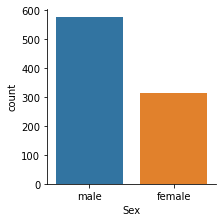

In [9]:
sns.catplot(x="Sex", kind="count", data=titanic_df, height=3)

In [10]:
titanic_df['Sex'].value_counts(normalize=True).round(2)

male      0.65
female    0.35
Name: Sex, dtype: float64

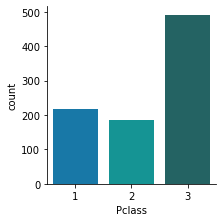

In [11]:
sns.catplot(x="Pclass", kind="count", data=titanic_df, height=3, palette="winter_d")

In [12]:
titanic_df['Pclass'].value_counts(normalize=True, sort=False).round(2)

1    0.24
2    0.21
3    0.55
Name: Pclass, dtype: float64

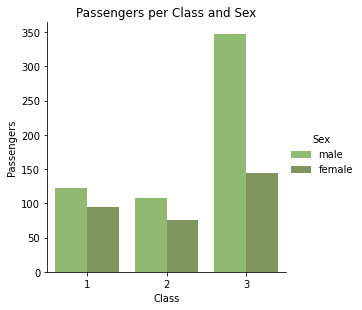

In [13]:
fig = sns.catplot(x="Pclass", kind="count", hue="Sex", data=titanic_df, height=4, palette="summer_d")
plt.xlabel("Class")
plt.ylabel("Passengers")
plt.title("Passengers per Class and Sex")
plt.show(fig)

In [14]:
titanic_df[['Pclass', 'Sex','PassengerId']].groupby(['Pclass', 'Sex']).count()/titanic_df[['Pclass','PassengerId']].groupby(['Pclass']).count()

PassengerId
Pclass Sex                
1      female     0.435185
       male       0.564815
2      female     0.413043
       male       0.586957
3      female     0.293279
       male       0.706721

We can observe that the majority of the passengers were male (65%) and from the third class (55%);

Classes 1 and 2 are somewhat balanced regarding sex of the passengers, while the third class is composed mostly by males (70%)

Next, let´s take a look on the Age distributions


<AxesSubplot:>

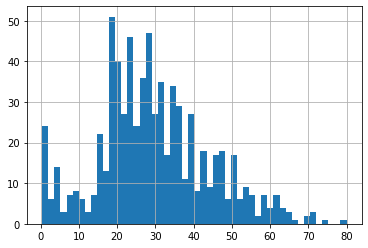

In [15]:
# source: https://seaborn.pydata.org/tutorial/distributions.html
titanic_df['Age'].hist(bins=50)

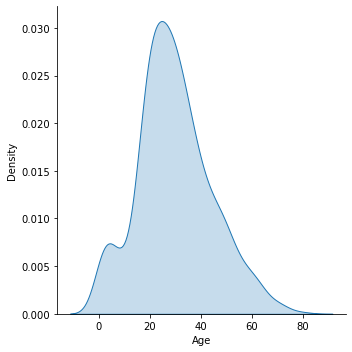

In [16]:
sns.displot(titanic_df, x="Age", kind="kde", fill="True")

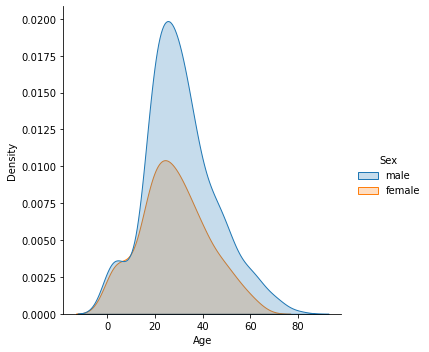

In [17]:
sns.displot(titanic_df, x="Age", hue="Sex", kind="kde", fill="True")

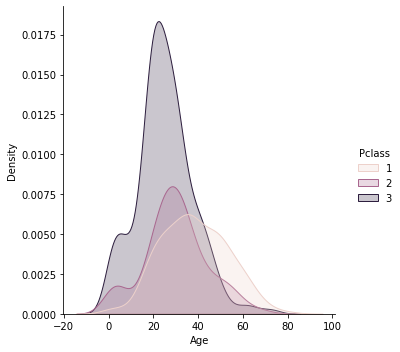

In [18]:
sns.displot(titanic_df, x="Age", hue="Pclass", kind="kde", fill="True")

Analysing the frequency curves for the passenger's age it apears we have two distinct groups with different distributions, one centered around 0-10 years old and the other centered around 20-30 years old. Let´s model our data to separete the children from the rest of the passengers.

In [19]:
titanic_df.loc[titanic_df['Age'] < 15, 'Person'] = "child"
titanic_df.loc[(titanic_df['Age'] >= 15) & (titanic_df['Sex'] == 'female'), 'Person'] = "female"
titanic_df.loc[(titanic_df['Age'] >= 15) & (titanic_df['Sex'] == 'male'), 'Person'] = "male"
titanic_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child


In [20]:
# How many passengers in each group?
titanic_df['Person'].value_counts()

male      414
female    222
child      78
Name: Person, dtype: int64

In [21]:
titanic_df['Person'].value_counts(normalize=True).round(2)

male      0.58
female    0.31
child     0.11
Name: Person, dtype: float64

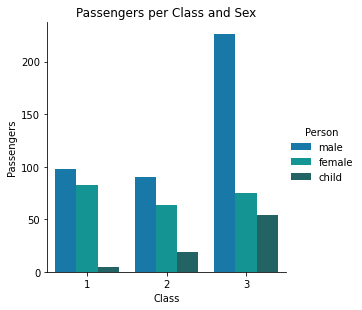

In [22]:
fig = sns.catplot(x="Pclass", kind="count", hue="Person", data=titanic_df, height=4, palette="winter_d")
plt.xlabel("Class")
plt.ylabel("Passengers")
plt.title("Passengers per Class and Sex")
plt.show(fig)

In [23]:
titanic_df[['Person','Pclass','Age']].groupby(['Person','Pclass']).mean().round(0).astype(int)

Age
Person Pclass     
child  1         6
       2         5
       3         6
female 1        35
       2        32
       3        27
male   1        42
       2        34
       3        29

How many of these passengers were alone and how many were with family? We need to model our data and create a column to show that.

In [24]:
# if columns SibSp or Parch >0 then the passanger had family onboard

Family_size = titanic_df.SibSp + titanic_df.Parch
titanic_df.loc[Family_size == 0, 'Family'] = "Alone"
titanic_df.loc[Family_size > 0, 'Family'] = "With Family"
titanic_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,NaN,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child,With Family


In [25]:
# check
titanic_df['Family'].unique()

array(['With Family', 'Alone'], dtype=object)

In [26]:
titanic_df['Family'].value_counts(normalize=True).round(2)

Alone          0.6
With Family    0.4
Name: Family, dtype: float64

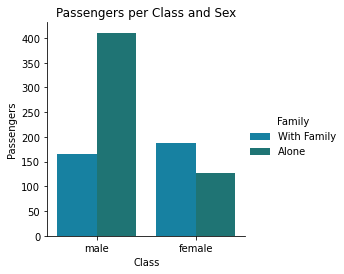

In [27]:
fig = sns.catplot(x="Sex", kind="count", hue="Family", data=titanic_df, height=3.5, palette="winter_d")
plt.xlabel("Class")
plt.ylabel("Passengers")
plt.title("Passengers per Class and Sex")
plt.show(fig)

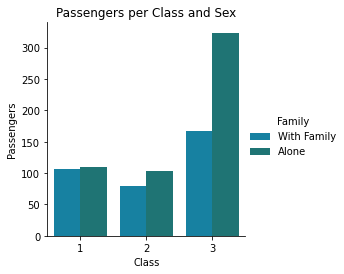

In [28]:
fig = sns.catplot(x="Pclass", kind="count", hue="Family", data=titanic_df, height=3.5, palette="winter_d")
plt.xlabel("Class")
plt.ylabel("Passengers")
plt.title("Passengers per Class and Sex")
plt.show(fig)

Most of the passengers (60%) were alone on the ship. The proportion of alone was higher among males and 3rd class passengers.

### Exploratory Data Analysis - Part 2
- Identify most important features to predict Survival Rate

Now, let's analyse the correlation of the features with the survival rate. 

First, let´s see what was the survival rate for our train data.

In [29]:
titanic_df['Survived'].value_counts(normalize=True).round(2)

0    0.62
1    0.38
Name: Survived, dtype: float64

Most passengers did not survive, let´s start digging on the features that can help us predict survival rate.

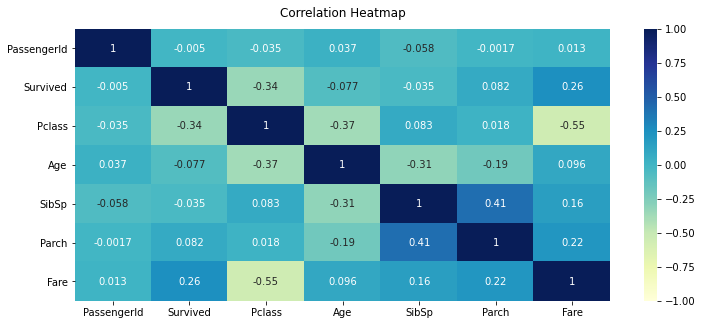

In [30]:
#source: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(12,5))
    
heatmap = sns.heatmap(titanic_df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

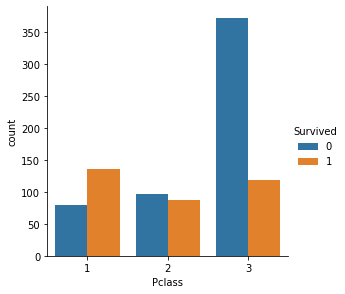

In [31]:
sns.catplot(x='Pclass', kind='count', hue='Survived', height=4, data=titanic_df)

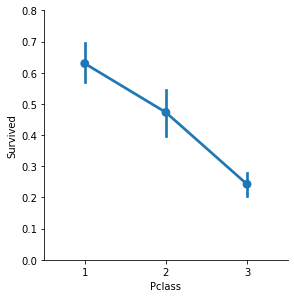

In [32]:
sns.catplot(x="Pclass", y="Survived", kind="point", data=titanic_df, height=4).set(ylim=(0, 0.8))

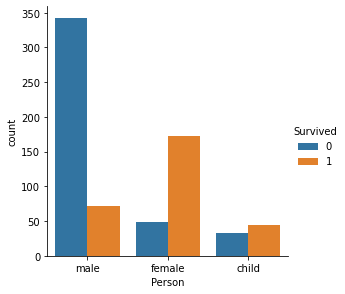

In [33]:
sns.catplot(x='Person', kind='count', hue='Survived', height=4, data=titanic_df)

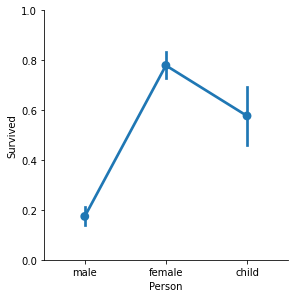

In [34]:
sns.catplot(x="Person", y="Survived", kind="point", data=titanic_df, height=4)
plt.ylim(0, 1)
plt.show()

In [35]:
titanic_df.groupby(['Pclass', 'Person', 'Survived']).count()['PassengerId']

Pclass  Person  Survived
1       child   0             1
                1             4
        female  0             2
                1            81
        male    0            61
                1            37
2       child   1            19
        female  0             6
                1            58
        male    0            84
                1             6
3       child   0            32
                1            22
        female  0            41
                1            34
        male    0           197
                1            29
Name: PassengerId, dtype: int64

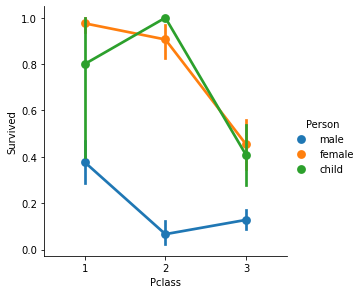

In [36]:
sns.catplot(x="Pclass", y="Survived", hue="Person", kind="point", data=titanic_df, height=4)

We can basically divide the passengers into 3 clusters:

1 - High survival rate: Females and Children on 1st and 2nd class

2 - Medium survival rate: Females and Children on 3rd class and Males on 1st class

3 - Low survival rate: Males on 2nd and 3rd class


Next we can take a closer look on the medium survival rate group analysing the variability on the survival rate to see if there is any factor that could influence the in-group survival rate.

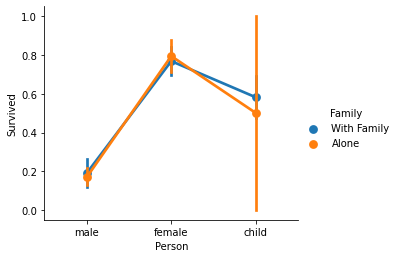

In [37]:
sns.catplot(x="Person", y="Survived", kind="point", hue='Family', data=titanic_df, height=3.5, aspect=1.2)

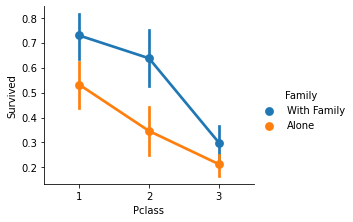

In [38]:
sns.catplot(x="Pclass", y="Survived", kind="point", hue='Family', data=titanic_df, height=3, aspect=1.2)

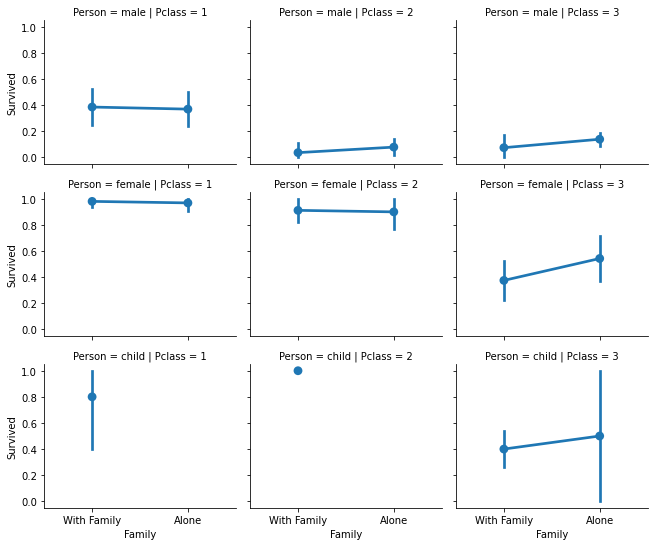

In [39]:
sns.catplot(x='Family', y='Survived', kind='point', col='Pclass', row='Person', data=titanic_df, height=2.5, aspect=1.2)

Looking at the graphs it does not appear to be any correlation between having *family* onboard and survival rate, once we control for Sex and Pclass. The only exception is for 3rd class females, altough from the graph it is not clear if the differnce in means are statistically significant.

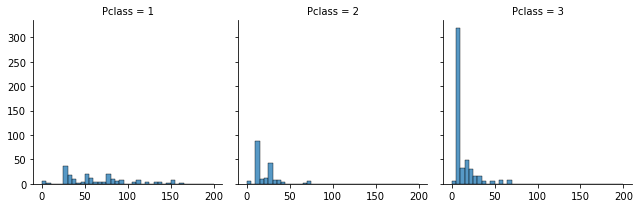

In [40]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid
g = sns.FacetGrid(titanic_df, col="Pclass")
g.map_dataframe(sns.histplot, x="Fare", binwidth=5, binrange=(0, 200))

# temos algum erro na fare da Pclass 1 = valor próximo de 0; temos 2 outliers = valor >$500

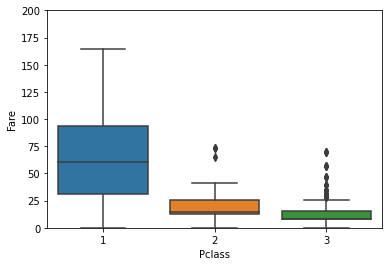

In [41]:
sns.boxplot(x='Pclass', y='Fare', data=titanic_df).set(ylim=(0, 200))
plt.show()

To make the analysis easier (and more robust to outliers) we can divide the fares into groups(Binning).

In [42]:
# source: https://getpocket.com/read/3199461260
# source: https://pandas.pydata.org/docs/reference/api/pandas.qcut.html
# q.cut divide em x ranges com o mesmo número de observações em cada range

categorical_fare = pd.qcut(titanic_df['Fare'], 5)
titanic_df['Cat. Fare'] = categorical_fare
titanic_df[['Cat. Fare', 'Survived']].groupby(['Cat. Fare']).mean()

,Survived
Cat. Fare,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


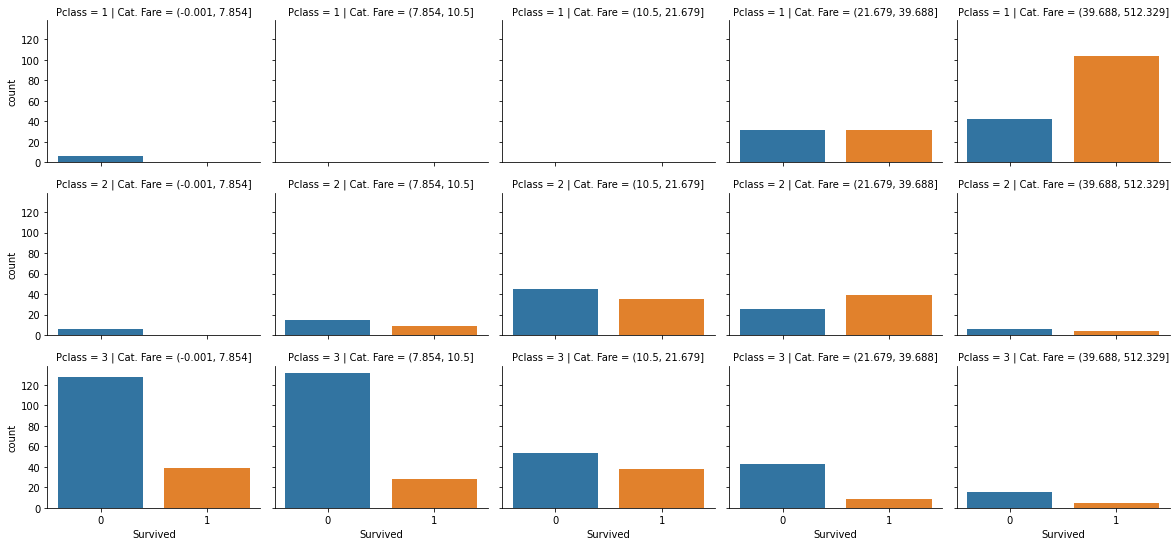

In [43]:
sns.catplot(x='Survived', kind='count', col='Cat. Fare', row='Pclass', data=titanic_df, height=2.5, aspect=1.3 )

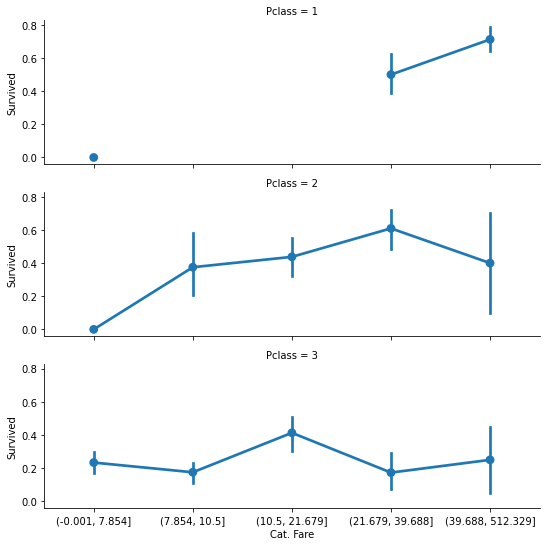

In [44]:
sns.catplot(x='Cat. Fare', y='Survived', kind='point', row='Pclass', data=titanic_df, height=2.5, aspect=3)

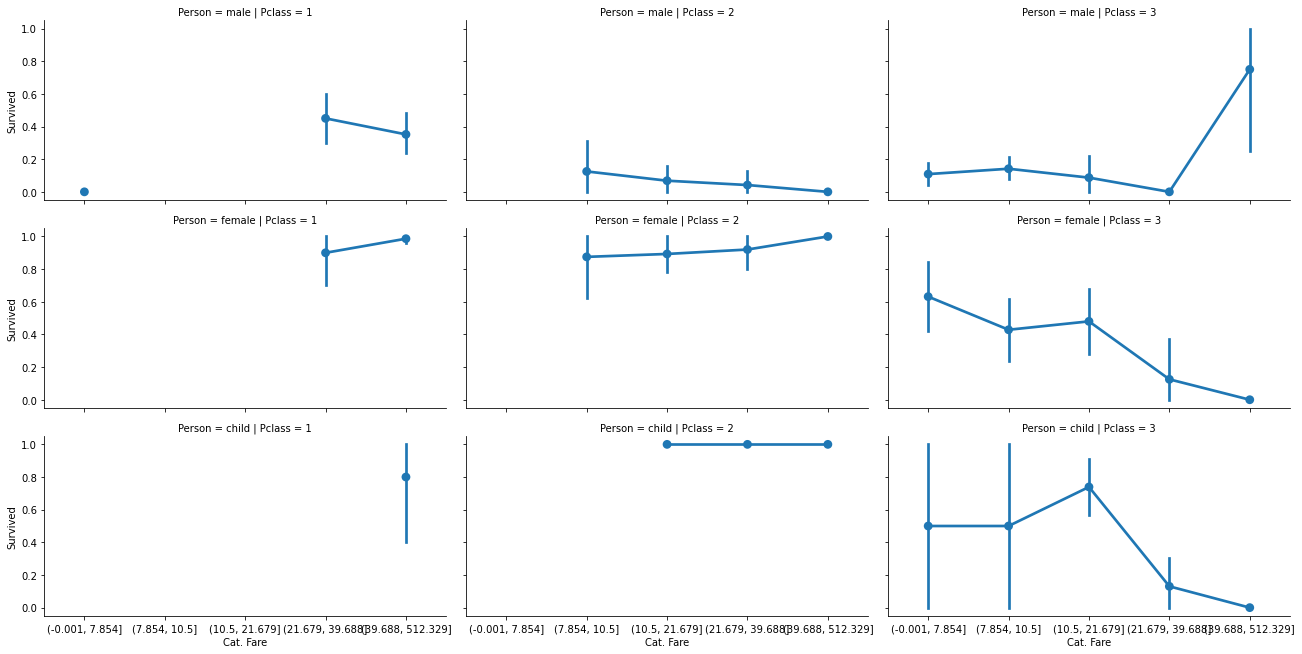

In [45]:
sns.catplot(x='Cat. Fare', y='Survived', kind='point', col='Pclass', row='Person', data=titanic_df, height=3, aspect=2)

Looking at the graphs it does not appear to be any correlation between Fare prices and survival, once we control for Sex and Pclass. The only exception is 3rd class females, which appears to be negatively correlated with Fare prices (altough from the graph it is not clear if the differnce in means are statistically significant).

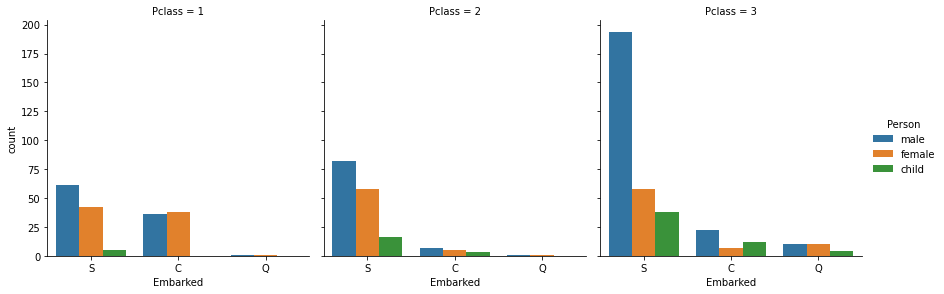

In [46]:
sns.catplot(x='Embarked', kind='count', hue='Person', col='Pclass', data=titanic_df, height=4)

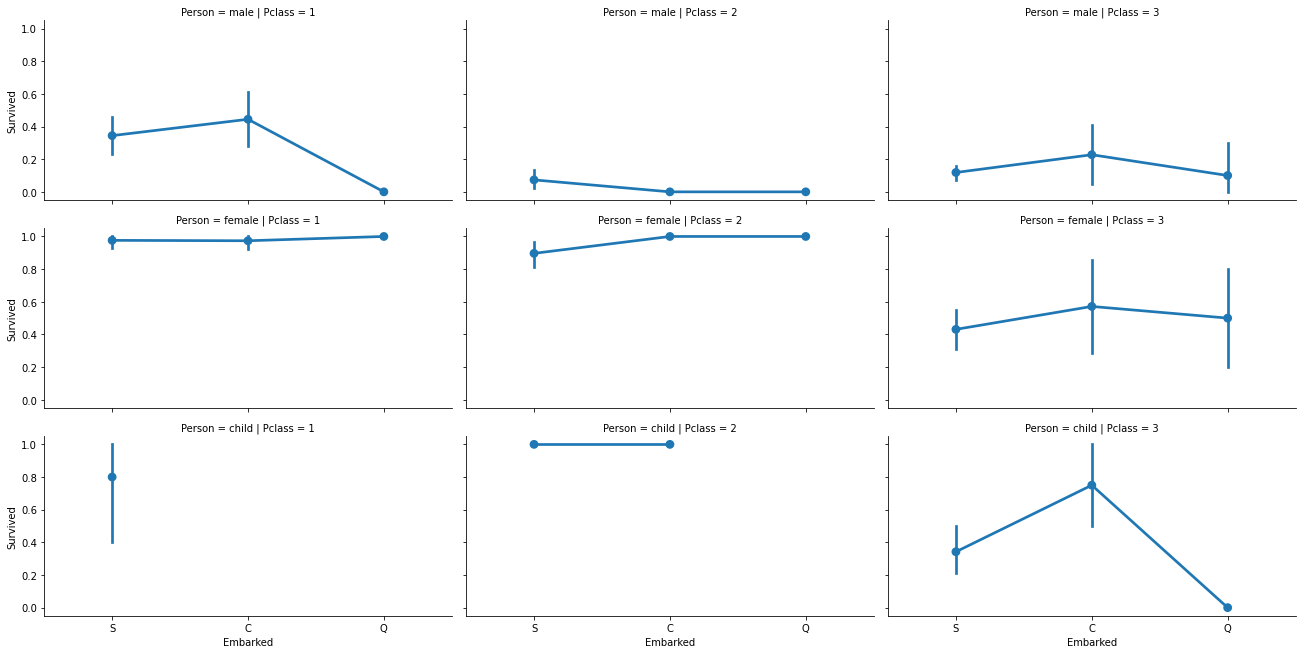

In [47]:
sns.catplot(x='Embarked', y='Survived', kind='point', col='Pclass', row='Person', data=titanic_df, height=3, aspect=2)

Looking at the graphs it does not appear to be any correlation between Fare prices and survival, once we control for Sex and Pclass.

<AxesSubplot:xlabel='Age', ylabel='Count'>

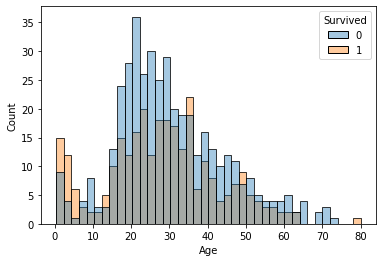

In [48]:
sns.histplot(data=titanic_df, x='Age', hue='Survived', alpha=0.4, bins=40)

In [49]:
# cada label deve ter uma bin inicial e final; inicial é > e final <=
# source: https://www.analyticsvidhya.com/blog/2020/12/feature-engineering-using-pandas-for-beginners/?utm_source=pocket_mylist

bins = [0,14,24,34,54,100]
groups = ['Child','Youg Adult','Adult','Older Adult', 'Elder']

titanic_df['Age Range'] = pd.cut(titanic_df['Age'], bins=bins, labels=groups)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person,Family,Cat. Fare,Age Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family,"(-0.001, 7.854]",Youg Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family,"(39.688, 512.329]",Older Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Alone,"(7.854, 10.5]",Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family,"(39.688, 512.329]",Older Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Alone,"(7.854, 10.5]",Older Adult


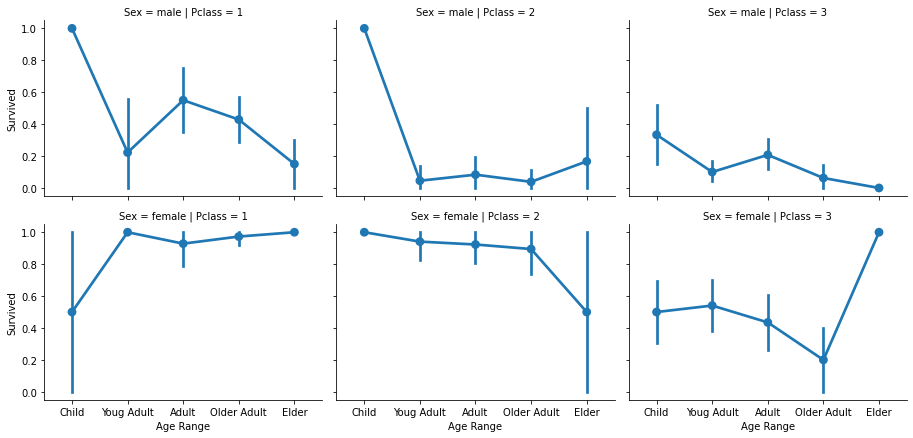

In [50]:
sns.catplot(x='Age Range', y='Survived', kind='point', col='Pclass', row='Sex', data=titanic_df.sort_values(by=['Age'],ascending=True), height=3, aspect=1.4)

Apart from the noted difference between children and adults, there was no observed correlation between age and survival rate once we control for Sex and Pclass.

### Data Cleaning
Clean the data and replace missing values when necessary

In [51]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    object  
 11  Person       714 non-null    object  
 12  Family       891 non-null    object  
 13  Cat. Fare    891 non-null    category
 14  Age Range    714 non-null    category
dtypes: category(2), float64(2), int64(5), object(6)
memory usage: 92.8+ KB


For the embarked feature we will replace the missing values with the most frequent ocurrance.

In [52]:
freq_port = titanic_df['Embarked'].mode()[0]
freq_port

'S'

In [53]:
titanic_df['Embarked'].fillna(freq_port, inplace=True)
titanic_df['Embarked'].isna().sum()

0

For the age column, we will replace missing values with the median for each Sex-Pclass soubgroup

In [54]:
titanic_df['Age'] = titanic_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
titanic_df['Age'].isnull().sum()

0

In [55]:
# update the Person column with the new Age data

titanic_df.loc[titanic_df['Age'] < 15, 'Person'] = "child"
titanic_df.loc[(titanic_df['Age'] >= 15) & (titanic_df['Sex'] == 'female'), 'Person'] = "female"
titanic_df.loc[(titanic_df['Age'] >= 15) & (titanic_df['Sex'] == 'male'), 'Person'] = "male"
titanic_df['Person'].isnull().sum()

0

In [56]:
# update the Age Range column with the new Age data

bins = [0,14,24,34,54,100]
groups = ['Child','Young Adult','Adult','Old Adult', 'Elder']

titanic_df['Age Range'] = pd.cut(titanic_df['Age'], bins=bins, labels=groups)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person,Family,Cat. Fare,Age Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family,"(-0.001, 7.854]",Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family,"(39.688, 512.329]",Old Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Alone,"(7.854, 10.5]",Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family,"(39.688, 512.329]",Old Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Alone,"(7.854, 10.5]",Old Adult


### Feature Engineering
With the missing values replaced, we can start converting categorical data into numeric. That is important since most ML models don't deal with categorical features.

In [57]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  Person       891 non-null    object  
 12  Family       891 non-null    object  
 13  Cat. Fare    891 non-null    category
 14  Age Range    891 non-null    category
dtypes: category(2), float64(2), int64(5), object(6)
memory usage: 92.8+ KB


In [58]:
titanic_df['Sex Encode'] = LabelEncoder().fit_transform(titanic_df['Sex'])
titanic_df['Fare Encode'] = LabelEncoder().fit_transform(titanic_df['Cat. Fare'])
titanic_df['Family Encode'] = LabelEncoder().fit_transform(titanic_df['Family'])
titanic_df['Person Encode'] = LabelEncoder().fit_transform(titanic_df['Person'])
titanic_df['Age Encode'] = titanic_df['Age Range'].map({'Child':0, 'Young Adult':1, 'Adult':2, 'Old Adult':3, 'Elder':4}).astype(int)
titanic_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person,Family,Cat. Fare,Age Range,Sex Encode,Fare Encode,Family Encode,Person Encode,Age Encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family,"(-0.001, 7.854]",Young Adult,1,0,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family,"(39.688, 512.329]",Old Adult,0,4,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Alone,"(7.854, 10.5]",Adult,0,1,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family,"(39.688, 512.329]",Old Adult,0,4,1,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Alone,"(7.854, 10.5]",Old Adult,1,1,0,2,3
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q,male,Alone,"(7.854, 10.5]",Adult,1,1,0,2,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,male,Alone,"(39.688, 512.329]",Old Adult,1,4,0,2,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child,With Family,"(10.5, 21.679]",Child,1,2,1,0,0


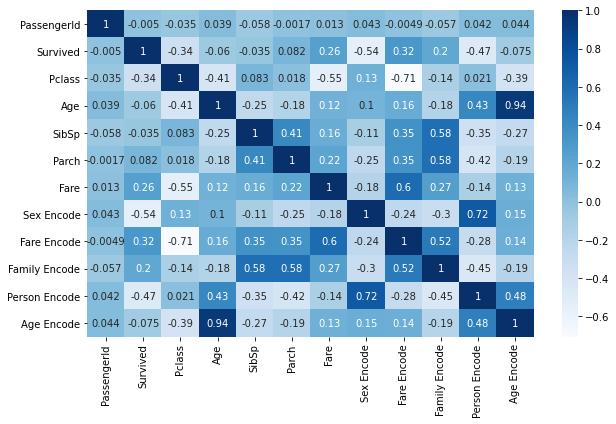

In [59]:
plt.figure(figsize=(10,6))
cor=titanic_df.corr()
sns.heatmap(cor,annot=True,cmap="Blues")
plt.show()